# CC09 Modern Physics Practicals

## I-V Chracteristics of a Tunneling Diode

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as so
import scipy as sp
from scipy.optimize import curve_fit
from numpy import polyfit
import sympy as smp

**Experiment 1**

In [2]:
x_data = np.array([0, 5, 10, 15, 20, 26, 30, 36, 40, 45, 50, 55, 60, 65, 70,
                   75, 80, 82, 84, 85, 86, 87, 88, 89, 90, 91, 92, 95, 100, 106,
                   110, 120, 124, 130, 136, 140, 145, 150, 155, 165, 175, 185, 200, 210, 220,
                   225, 230, 235, 240, 245, 260, 265, 275, 285, 295, 310, 320, 330, 345, 350,
                   360, 370, 390, 410, 440, 460, 480, 500, 530])
                   
y_data = np.array([0.6, 3.9, 7.5, 11, 14.3, 18, 20.6, 24.3, 26.5, 29.4, 32.2, 34.7, 37, 39.3, 41.3,
                   43, 44.4, 44.9, 45.3, 45.5, 45.7, 45.9, 46.1, 46.2, 46.4, 35.5, 35.2, 33.3, 31.5, 30.8,
                   30.7, 30.3, 29.2, 26.1, 26.2, 24.2, 23.3, 21.6, 21.2, 20.2, 20.1, 19.5, 18.9, 17.8, 17.4,
                   16.4, 16, 15, 12.4, 12.3, 11, 8, 7.6, 4.8, 4.6, 4.4, 4.4, 4.4, 4.6, 4.7, 
                   5, 5.5, 7.4, 10.7, 19.9, 29.3, 40.2, 53.5, 76.4])
x_data.size

69

**Experiment 2**

In [3]:
x_data = np.array([0, 5, 10, 20, 30, 50, 70, 75, 80, 85, 88, 90, 92, 95, 100, 110,
130, 150, 190, 230, 260, 280, 300, 310, 320, 330, 340, 350, 370, 400, 450, 500, 530,])

y_data = np.array([0, 4.1, 7.5, 14.3, 20.8, 32.1, 41.35, 42.95, 44.45, 45.5, 41.95,
41.4, 34.7, 33.2, 31.25, 30.5, 26.25, 22.4, 19.1, 15.9, 11.1, 5.3, 4.5, 4.4, 4.3,
4.3, 4.4, 4.6, 5.45, 8.55, 24, 53.6, 76.25])
x_data.size

33

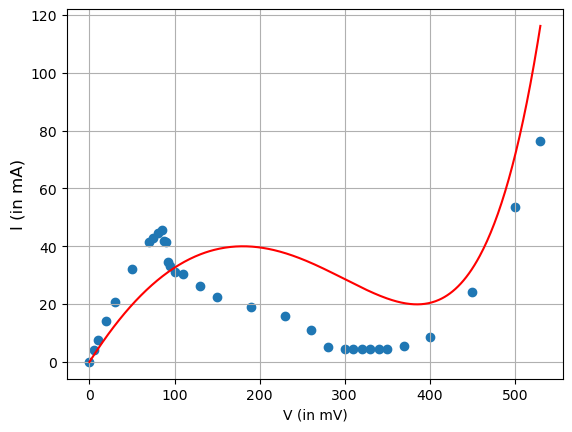

In [4]:
def model_f(x, A, VV, VT, Iso):
    return A*(x*(VV-x) / VT) + Iso*(np.exp(x/VT) - 1)

# popt, pcov = curve_fit(model_f, x_data, y_data, p0=[0.15,300,100,1.5])
# Ap, VVp, VTp, Isop = popt
x_model = np.linspace(min(x_data), max(x_data), 500)
# y_model = model_f(x_model, Ap, VVp, VTp, Isop)
y_model = model_f(x_model, 0.15, 300, 100, 1.5)

plt.scatter(x_data,y_data)
plt.plot(x_model,y_model, color='r')
plt.xlabel('V (in mV)')
plt.ylabel('I (in mA)', fontsize=12)
plt.grid()
plt.show()

x, y = smp.symbols('x y', real=True, positive=True)
# y = Ap*(x*(VVp-x) / VTp) + Isop*(smp.exp(x/VTp) - 1)

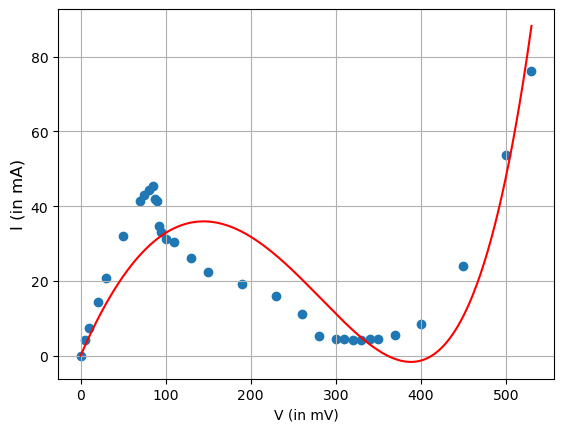

array([1.19183970e-02, 1.51090871e+02, 1.72686883e+01])

In [5]:
### modified eqn

def model_f(x, a, VT, Iso):
    return Iso*(-(1 - a*x)**2 + np.exp(x/VT))

popt, pcov = curve_fit(model_f, x_data, y_data, p0=[0.5,100,1.5])
ap, VTp, Isop = popt
x_model = np.linspace(min(x_data), max(x_data), 500)
y_model = model_f(x_model, ap, VTp, Isop)

plt.scatter(x_data,y_data)
plt.plot(x_model,y_model, color='r')
plt.xlabel('V (in mV)')
plt.ylabel('I (in mA)', fontsize=12)
plt.grid()
plt.show()
display(popt)
#x, y = smp.symbols('x y', real=True, positive=True)
#y = Ap*(x*(VVp-x) / VTp) + Isop*(smp.exp(x/VTp) - 1)

In [6]:
import numpy.linalg as npla
def polyfitn(n, x_data, y_data):
    '''Fitting of nth degree polynomial
    function used: polyfitn(n, x_data, y_data)
    n: degree of polynomial
    x_data: x array of data
    y_data: y array of data
    return: p (fitting parameters in form of an array), 
                yfn (fitting function as a lambda function yfn(x))'''
    x1, y1 = x_data, y_data
    mat1 = [[np.sum(x_data**(i+j)) for i in range(n)] for j in range(n)]
    mat2 = [np.sum(x_data**i*y_data) for i in range(n)]
    mat1, mat2 = np.array(mat1), np.array(mat2)
    p = npla.inv(mat1) @ mat2
    yfn = lambda x: sum([p[i]*x**i for i in range(n)])  # don't use np.sum
    return p, yfn

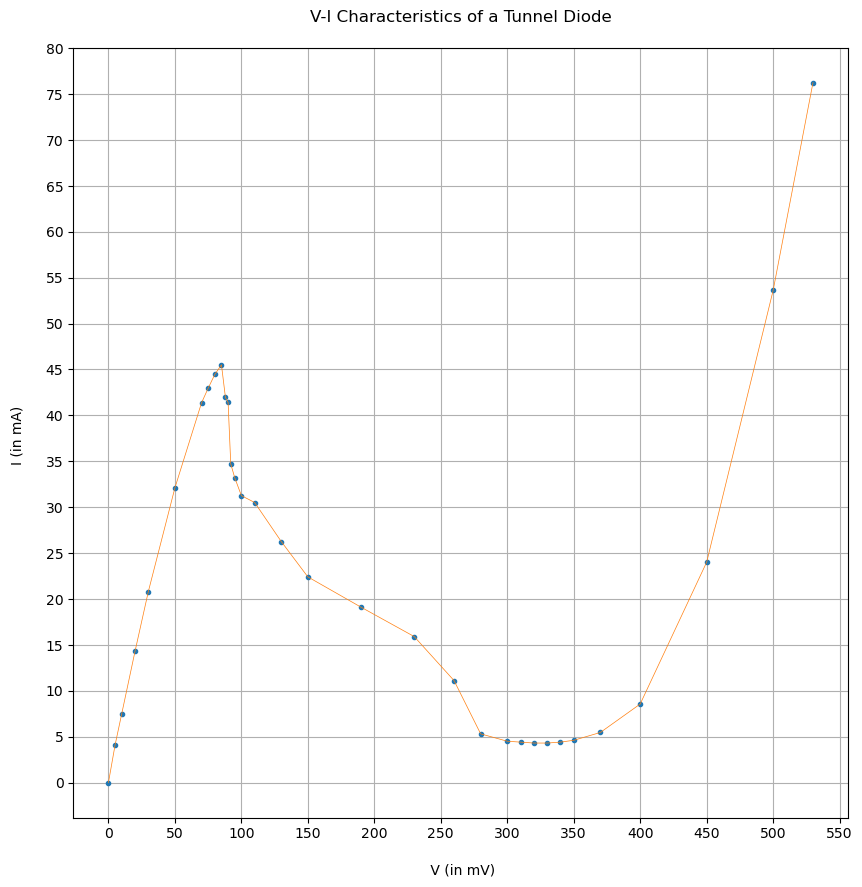

In [7]:
# pfit = polyfit(x_data, y_data, 20)
# dg = pfit.size-1
# y_fn = lambda x: sum([pfit.T[i]*x**(dg-i) for i in range(dg)])
# y_fit = y_fn(x_data)

# p, yfn = polyfitn(2, x_data, y_data)

plt.figure(figsize=(10,10))
plt.title('V-I Characteristics of a Tunnel Diode\n')
plt.plot(x_data, y_data, 'o', ms=3)
plt.plot(x_data, y_data, lw=0.5)
# plt.plot(x_data, yfn(x_data), lw=0.5)
plt.xlabel('\n V (in mV)')
plt.xticks(np.arange(0,600,50))
plt.ylabel('I (in mA) \n')
plt.yticks(np.arange(0,85,5))
plt.grid()
plt.savefig('vi characteristics of tunnel diode', dpi=600)
plt.show()

In [8]:
import pandas as pd

In [9]:
df1 = pd.DataFrame({
    'V (in mV)': x_data,
    'I (in mA)': y_data
})
df1.to_excel('vi - tunnel diode.xlsx')
df1.head()

,V (in mV),I (in mA)
0,0,0.0
1,5,4.1
2,10,7.5
3,20,14.3
4,30,20.8


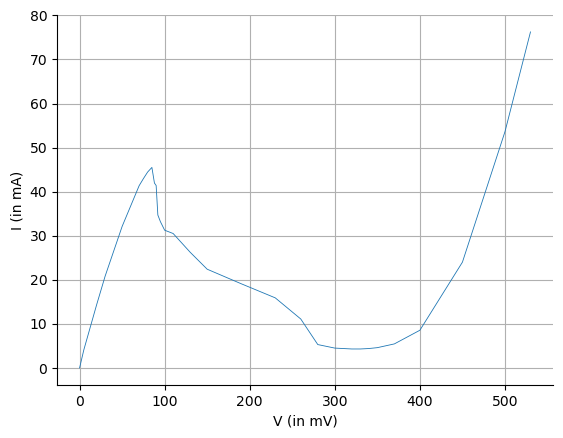

In [10]:
so.lineplot(data=df1, x='V (in mV)', y='I (in mA)', lw=0.6)
plt.grid()
so.despine()
plt.show()